In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

os.listdir()

['avalanche_scraper.ipynb',
 'forecasts_cleanup.ipynb',
 'avy_X-y.csv',
 'forecasts_no_dups.csv',
 'requirements.txt',
 'clean_weather_data.csv',
 'combine data.ipynb',
 '.ipynb_checkpoints',
 'predictive_model_eda.ipynb',
 'data',
 '.git',
 'timberline_cleaned_weather.csv',
 'weather cleanup.ipynb',
 'cleaner_forecast_data.csv']

In [2]:
weather = pd.read_csv('clean_weather_data.csv', index_col='Date/Time (PST)')
forecasts = pd.read_csv('forecasts_no_dups.csv', index_col='forecast_for_date')

In [3]:
forecasts.index = pd.to_datetime(forecasts.index)

In [4]:
pd.to_datetime(forecasts.index)

DatetimeIndex(['2013-12-11', '2013-12-12', '2013-12-13', '2013-12-14',
               '2013-12-15', '2013-12-16', '2013-12-17', '2013-12-18',
               '2013-12-19', '2013-12-20',
               ...
               '2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01',
               '2017-12-02', '2017-12-03', '2017-12-04', '2017-12-05',
               '2017-12-06', '2017-12-07'],
              dtype='datetime64[ns]', name='forecast_for_date', length=547, freq=None)

In [5]:
weather.index = pd.to_datetime(weather.index)

In [6]:
weather.index

DatetimeIndex(['2014-09-23 09:00:00', '2014-09-23 10:00:00',
               '2014-09-23 11:00:00', '2014-09-23 12:00:00',
               '2014-09-23 13:00:00', '2014-09-23 14:00:00',
               '2014-09-23 15:00:00', '2014-09-23 16:00:00',
               '2014-09-23 17:00:00', '2014-09-23 18:00:00',
               ...
               '2017-12-08 03:00:00', '2017-12-08 04:00:00',
               '2017-12-08 05:00:00', '2017-12-08 06:00:00',
               '2017-12-08 07:00:00', '2017-12-08 08:00:00',
               '2017-12-08 09:00:00', '2017-12-08 10:00:00',
               '2017-12-08 11:00:00', '2017-12-08 12:00:00'],
              dtype='datetime64[ns]', name='Date/Time (PST)', length=28094, freq=None)

In [7]:
combined = weather.join(forecasts)

In [8]:
combined.fillna(method='ffill', limit=24, inplace=True)  # propagate forecast over whole day

In [9]:
combined.drop(combined.index[-12:], inplace=True)  # don't have today's forecast yet

In [10]:
combined.tail()

,Temperature_m,Relative_Humidity_m,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,precip,depth,pressure,...,likelihoods,problems,storm_slabs,wet_slabs,persistent,wind_slab,loose_wet,glide,cornices,loose_dry
2017-12-07 20:00:00,36.72,31.78,44.55,13.19,4.29,11.1,79.4,0.0,25.185,1031.995,...,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['loose-wet', 'wind-slab']",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2017-12-07 21:00:00,37.08,30.83,44.55,13.19,4.29,11.1,79.4,0.0,25.180,1031.983,...,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['loose-wet', 'wind-slab']",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2017-12-07 22:00:00,37.57,30.63,44.55,13.19,4.29,11.1,79.4,0.0,25.180,1031.991,...,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['loose-wet', 'wind-slab']",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2017-12-07 23:00:00,38.17,29.13,44.55,13.19,4.29,11.1,79.4,0.0,25.180,1032.113,...,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['loose-wet', 'wind-slab']",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2017-12-08 00:00:00,39.03,27.92,44.55,13.19,4.29,11.1,79.4,0.0,25.145,1032.123,...,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['loose-wet', 'wind-slab']",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [11]:
combined.corr()

,Temperature_m,Relative_Humidity_m,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,precip,depth,pressure,...,below,near,storm_slabs,wet_slabs,persistent,wind_slab,loose_wet,glide,cornices,loose_dry
Temperature_m,1.000000,-0.708461,0.970802,-0.615248,-0.223290,-0.243150,-0.014004,-0.174594,-0.420364,0.425484,...,-0.134864,-0.174007,-0.262128,0.107351,-0.069088,-0.469493,0.509725,0.033985,0.251369,-0.240472
Relative_Humidity_m,-0.708461,1.000000,-0.713021,0.882982,0.176737,0.209479,0.146733,0.332043,0.254508,-0.463379,...,0.319036,0.355904,0.437763,0.054256,0.028532,0.353629,-0.322516,0.005525,-0.144939,0.085125
Temperature_tl,0.970802,-0.713021,1.000000,-0.705106,-0.285108,-0.303546,-0.107537,-0.188948,-0.418130,0.468414,...,-0.161828,-0.213433,-0.324843,0.085503,-0.059381,-0.495090,0.519674,0.028598,0.236974,-0.218877
Relative_Humidity_tl,-0.615248,0.882982,-0.705106,1.000000,0.266392,0.289607,0.293047,0.307863,0.243407,-0.495520,...,0.298553,0.339670,0.458606,0.076110,0.009961,0.350843,-0.299860,0.019324,-0.096001,0.013979
Wind_Speed_Average_tl,-0.223290,0.176737,-0.285108,0.266392,1.000000,0.946515,0.368663,0.251893,0.040822,-0.185986,...,0.206956,0.251795,0.197713,0.078606,-0.036485,0.113587,-0.151098,-0.011273,-0.045945,0.015197
Wind_Speed_Maximum_tl,-0.243150,0.209479,-0.303546,0.289607,0.946515,1.000000,0.323824,0.290809,0.061764,-0.240790,...,0.228639,0.277034,0.215449,0.089623,-0.042288,0.127125,-0.146785,0.001197,-0.050676,0.013639
Wind_Direction_(deg.)_tl,-0.014004,0.146733,-0.107537,0.293047,0.368663,0.323824,1.000000,0.124157,-0.007741,-0.170911,...,0.091649,0.118878,0.207551,0.053532,-0.019576,0.040851,-0.075103,0.041284,-0.041184,-0.010168
precip,-0.174594,0.332043,-0.188948,0.307863,0.251893,0.290809,0.124157,1.000000,0.060293,-0.290026,...,0.251549,0.296395,0.261786,0.071271,-0.025356,0.096649,-0.129269,-0.015448,-0.075342,0.006837
depth,-0.420364,0.254508,-0.418130,0.243407,0.040822,0.061764,-0.007741,0.060293,1.000000,-0.226555,...,0.405945,0.218819,-0.115185,0.090195,-0.051420,0.207877,0.193162,-0.089372,0.428944,-0.090870
pressure,0.425484,-0.463379,0.468414,-0.495520,-0.185986,-0.240790,-0.170911,-0.290026,-0.226555,1.000000,...,-0.251499,-0.249882,-0.317676,-0.035946,0.028785,-0.206190,0.278890,-0.014676,0.058442,-0.038917


In [12]:
# let's see how ugly it is to extract additional data from images: sizes and octagons
import matplotlib.pyplot as plt
from PIL import Image
import requests
import json
from io import BytesIO
%matplotlib inline

In [13]:
print(len(combined.octagons.unique()))
combined.octagons.unique()

415


array([nan,
       "['/avalanche-forecast/octagon/problem/1985.png', '/avalanche-forecast/octagon/problem/1986.png']",
       "['/avalanche-forecast/octagon/problem/1995.png', '/avalanche-forecast/octagon/problem/1996.png']",
       "['/avalanche-forecast/octagon/problem/2003.png', '/avalanche-forecast/octagon/problem/2002.png']",
       "['/avalanche-forecast/octagon/problem/2012.png']",
       "['/avalanche-forecast/octagon/problem/2030.png', '/avalanche-forecast/octagon/problem/2032.png']",
       "['/avalanche-forecast/octagon/problem/2038.png', '/avalanche-forecast/octagon/problem/2039.png']",
       "['/avalanche-forecast/octagon/problem/2045.png', '/avalanche-forecast/octagon/problem/2046.png']",
       "['/avalanche-forecast/octagon/problem/2052.png', '/avalanche-forecast/octagon/problem/2051.png']",
       "['/avalanche-forecast/octagon/problem/2072.png', '/avalanche-forecast/octagon/problem/2073.png']",
       "['/avalanche-forecast/octagon/problem/2090.png', '/avalanche-fore

In [14]:
print(len(combined.sizes.unique()))  # 50 discrete urls
combined.sizes.unique()

51


array([nan,
       "['https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png', 'https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png']",
       "['https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-22.png', 'https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-22.png']",
       "['https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png']",
       "['https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png', 'https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-22.png']",
       "['https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png', 'https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-11.png']",
       "['https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-23.png', 'https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png']",
       "['https://d22fgw9k2fjwhz.cloudfront.net/media/images/siz

In [20]:
combined.sizes[-1]  # json doesn't like single-quotes

"['https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png', 'https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png']"

In [22]:
imgs = json.loads(combined.sizes[-1].replace('\'', '\"'))
imgs[0]

'https://d22fgw9k2fjwhz.cloudfront.net/media/images/size_images/size-12.png'

In [23]:
data = requests.get(imgs[0]).content
img = Image.open(BytesIO(data))

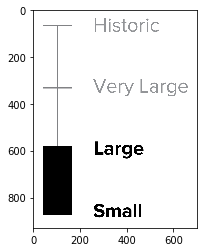

In [24]:
plt.imshow(img)   # would be easier with sizes to extract information from the filename;

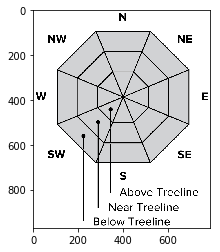

In [25]:
oct_url = 'https://www.nwac.us/avalanche-forecast/octagon/problem/1985.png' # from col 'octagons'
octagon = requests.get(oct_url).content
oct_img = Image.open(BytesIO(octagon))
plt.imshow(oct_img)
# too many different octagons to worry about this right now... 

In [26]:
# 'discussion' is full html files; we just made one-hot for 'problems' (which is a list)
# if we're dropping that we can also drop the images associated with each item in problems...
combined.drop(['discussion', 'problems', 'likelihoods', 'octagons', 'sizes'], axis=1, inplace=True)

In [27]:
forecasted = combined[combined.above >= 1]
# above is above-treeline forecast danger; this is just the set of times with forecasts
print(len(forecasted))

9910


In [28]:
# save this dataset to file to use elsewhere
forecasted.to_csv('avy_X-y.csv')